## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

## Chargement du dataset

In [2]:
df = pd.read_csv('dataset.csv')
df = df.dropna(inplace=False)

In [3]:
df

,HomeTeam,AwayTeam,FTR,MatchWeek,HomeScored,HomeConceded,AwayScored,AwayConceded,HomePoints,AwayPoints,...,HomeFormPts,AwayFormPts,Home3GW,Home5GW,Home3GL,Home5GL,Away3GW,Away5GW,Away3GL,Away5GL
0,Charlton,Man City,H,1,0.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Chelsea,West Ham,H,1,0.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Coventry,Middlesbrough,A,1,0.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Derby,Southampton,D,1,0.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Leeds,Everton,H,1,0.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35497,Granada,Espanol,D,38,44.0,61.0,40.0,53.0,37,41,...,8,2,0,0,0,0,0,0,0,0
35498,Osasuna,Mallorca,A,38,37.0,49.0,34.0,63.0,47,36,...,3,7,0,0,0,0,0,0,0,0
35499,Barcelona,Villarreal,A,38,68.0,36.0,61.0,37.0,73,56,...,10,7,0,0,0,0,0,0,0,0
35500,Sevilla,Ath Bilbao,H,38,52.0,30.0,43.0,35.0,67,55,...,7,10,0,0,0,0,0,0,0,0


In [4]:
groupes = df.groupby('FTR')
taille_echantillon = min([len(groupe) for _, groupe in groupes])
df = pd.concat([groupe.sample(taille_echantillon) for _, groupe in groupes])

In [5]:
def resultat(string):
    if string == 'H':
        return 1
    if string == 'D':
        return 0
    if string == 'A':
        return 2

df['FTR'] = df['FTR'].apply(resultat)

In [6]:
df_equipe = df[['HomeTeam', 'AwayTeam', 'FTR','WHH','WHD','WHA']]
#df = df.drop(['HomeTeam', 'AwayTeam', 'FTR','HomeFormPtsStr','AwayFormPtsStr','MatchWeek'], axis=1)
df = df.drop(['HomeTeam', 'AwayTeam', 'FTR','HomeFormPtsStr','AwayFormPtsStr','MatchWeek','WHH','WHD','WHA'], axis=1)
df

,HomeScored,HomeConceded,AwayScored,AwayConceded,HomePoints,AwayPoints,HomeFormPts,AwayFormPts,Home3GW,Home5GW,Home3GL,Home5GL,Away3GW,Away5GW,Away3GL,Away5GL
17679,38.0,52.0,34.0,44.0,30,38,1,3,0,0,0,0,0,0,0,0
8698,5.0,10.0,11.0,22.0,6,11,3,8,0,0,0,0,0,0,0,0
11759,16.0,14.0,16.0,10.0,17,20,11,10,0,0,0,0,1,0,0,0
26560,27.0,22.0,36.0,14.0,24,42,5,11,0,0,0,0,0,0,0,0
16628,21.0,27.0,13.0,39.0,17,6,1,2,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10130,2.0,0.0,1.0,2.0,3,0,3,0,0,0,0,0,0,0,0,0
26393,0.0,1.0,1.0,0.0,0,3,0,3,0,0,0,0,0,0,0,0
28468,19.0,24.0,20.0,24.0,20,20,5,6,0,0,0,0,0,0,0,0
4171,70.0,43.0,30.0,59.0,58,25,9,1,0,0,0,0,0,0,0,0


## Classification

In [7]:
X = df
y = df_equipe['FTR']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Arbre Décisionel

In [8]:
clf_DT = DecisionTreeClassifier()
clf_DT.fit(X_train, y_train)

y_pred_DT = clf_DT.predict(X_test)

accuracy_DT = clf_DT.score(X_test, y_test)

KNN

In [9]:
clf_KNN = KNeighborsClassifier(n_neighbors=8)
clf_KNN.fit(X_train, y_train)

y_pred_KNN = clf_KNN.predict(X_test)

accuracy_KNN = clf_KNN.score(X_test, y_test)

Random Forest

In [10]:
clf_RF = RandomForestClassifier(max_depth=2, random_state=0)
clf_RF.fit(X_train, y_train)

y_pred_RF = clf_RF.predict(X_test)

accuracy_RF = clf_RF.score(X_test, y_test)

SVM :

In [11]:
clf_SVM = SVC(kernel = 'rbf',random_state = 0)
clf_SVM.fit(X_train, y_train)

y_pred_SVM = clf_SVM.predict(X_test)

accuracy_SVM = clf_SVM.score(X_test, y_test)

Réseau de Neurones

In [12]:
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

# Création du modèle d'échelonnage
scaler = StandardScaler()
# Adaptation de ce modèle aux données étudiées
scaler.fit(X_train)
# Echelonnage des DataFrames
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
# Création du modèle séquentiel
model = Sequential()

model.add(Dense(512, activation='relu', input_shape=(16,), kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.7))

model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.7))

model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.7))

model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.7))

model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.7))

#model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
#model.add(Dropout(0.7))

#model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
#model.add(Dropout(0.7))

model.add(Dense(3, activation='softmax'))

# Compilation du modèle
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Affichage d'un résumé du modèle
model.summary()

# Entraînement du modèles
model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2, verbose=2)

# Évaluation du modèle
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               8704      
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               32896     
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 64)               

2023-03-19 15:30:11.350363: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-19 15:30:15.251864: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


270/270 - 5s - loss: 1.9352 - accuracy: 0.3554 - val_loss: 1.7336 - val_accuracy: 0.3286 - 5s/epoch - 17ms/step
Epoch 2/20
270/270 - 3s - loss: 1.6198 - accuracy: 0.3615 - val_loss: 1.5201 - val_accuracy: 0.3286 - 3s/epoch - 12ms/step
Epoch 3/20
270/270 - 3s - loss: 1.4342 - accuracy: 0.3761 - val_loss: 1.3748 - val_accuracy: 0.3286 - 3s/epoch - 12ms/step
Epoch 4/20
270/270 - 3s - loss: 1.3091 - accuracy: 0.3941 - val_loss: 1.2793 - val_accuracy: 0.3326 - 3s/epoch - 12ms/step
Epoch 5/20
270/270 - 3s - loss: 1.2298 - accuracy: 0.4119 - val_loss: 1.2128 - val_accuracy: 0.3632 - 3s/epoch - 12ms/step
Epoch 6/20
270/270 - 3s - loss: 1.1758 - accuracy: 0.4120 - val_loss: 1.1686 - val_accuracy: 0.3965 - 3s/epoch - 12ms/step
Epoch 7/20
270/270 - 3s - loss: 1.1424 - accuracy: 0.4219 - val_loss: 1.1447 - val_accuracy: 0.3968 - 3s/epoch - 12ms/step
Epoch 8/20
270/270 - 3s - loss: 1.1208 - accuracy: 0.4208 - val_loss: 1.1217 - val_accuracy: 0.4185 - 3s/epoch - 12ms/step
Epoch 9/20
270/270 - 3s - l

In [15]:
y_pred_RN_3 = model.predict(X_test, verbose=0)

2023-03-19 15:31:21.439138: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [16]:
y_pred_RN = []
for i in range(len(y_pred_RN_3)):
    maxi = max(y_pred_RN_3[i])
    if y_pred_RN_3[i][0] == maxi:
        y_pred_RN.append(0)
    if y_pred_RN_3[i][1] == maxi:
        y_pred_RN.append(1)
    if y_pred_RN_3[i][2] == maxi:
        y_pred_RN.append(2)

## Statistiques

In [17]:
print("Précision du DecisionTreeClassifier:", accuracy_DT)
print("Précision du KNeighborsClassifier:", accuracy_KNN)
print("Précision du RandomForestClassifier:", accuracy_RF)
print("Précision du SVM:", accuracy_SVM)
print("Précision du RN:", test_acc)

Précision du DecisionTreeClassifier: 0.3613274008157212
Précision du KNeighborsClassifier: 0.39377085650723026
Précision du RandomForestClassifier: 0.41268075639599555
Précision du SVM: 0.44975899147200593
Précision du RN: 0.43233224749565125


Decision Tree

<Axes: >

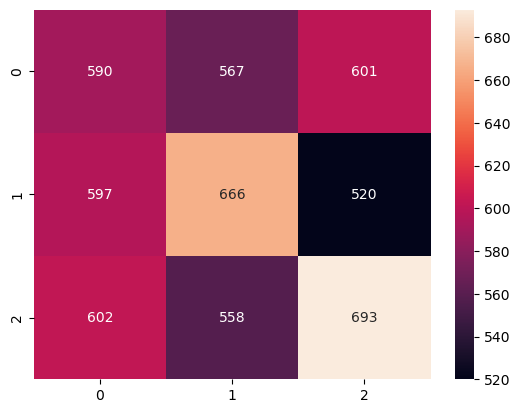

In [18]:
cm = confusion_matrix(y_test, y_pred_DT)
sns.heatmap(cm, annot=True, fmt='d')

KNN

<Axes: >

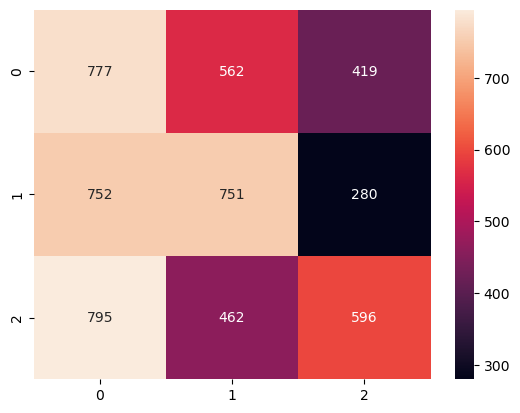

In [19]:
cm = confusion_matrix(y_test, y_pred_KNN)
sns.heatmap(cm, annot=True, fmt='d')

Random Forest

<Axes: >

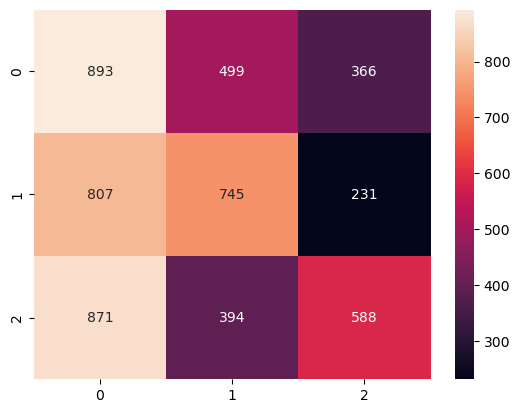

In [20]:
cm = confusion_matrix(y_test, y_pred_RF)
sns.heatmap(cm, annot=True, fmt='d')

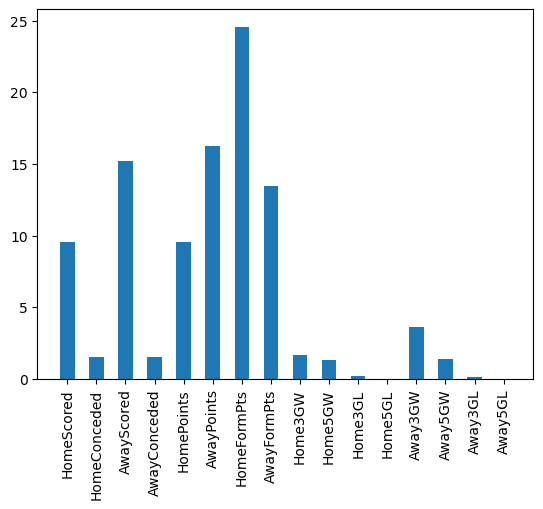

In [21]:
plt.bar(x=df.columns,height=clf_RF.feature_importances_*100,width=0.5,bottom=None, align='center')
plt.xticks(range(len(df.columns)), df.columns, rotation='vertical')
plt.show()

SVM

<Axes: >

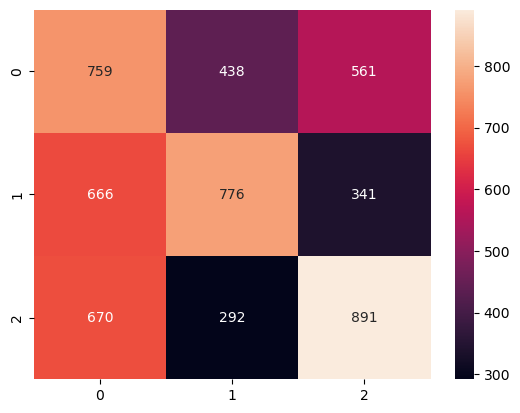

In [22]:
cm = confusion_matrix(y_test, y_pred_SVM)
sns.heatmap(cm, annot=True, fmt='d')

Réseau de Neurones

<Axes: >

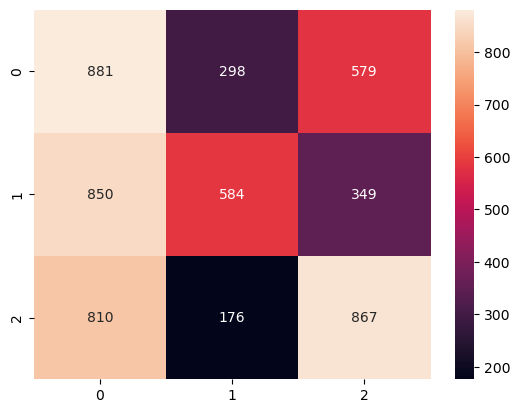

In [23]:
cm = confusion_matrix(y_test, y_pred_RN)
sns.heatmap(cm, annot=True, fmt='d')

## Résultats

In [24]:
df_final = pd.DataFrame()
df_final['Résultat'] = y_test
df_final['Prédiction'] = y_pred_RN
df_final = pd.merge(df_equipe[['HomeTeam', 'AwayTeam','WHH','WHD','WHA']].reset_index(), df_final.reset_index(), on='index')
df_final['Résultat'] = df_final['Résultat'].astype('int')
df_final = df_final.drop(['index'], axis=1)
df_final

,HomeTeam,AwayTeam,WHH,WHD,WHA,Résultat,Prédiction
0,Fortuna Dusseldorf,Nurnberg,1.91,3.5,4.00,2,0
1,Bordeaux,Nantes,2.25,3.2,3.30,2,0
2,Middlesbrough,West Ham,2.50,3.1,3.20,2,0
3,Mallorca,Sevilla,5.00,3.8,1.70,2,2
4,Sevilla,Barcelona,6.00,4.0,1.53,2,2
...,...,...,...,...,...,...,...
5389,Werder Bremen,FC Koln,1.29,5.0,8.50,1,1
5390,Man United,Portsmouth,1.25,4.5,10.00,1,1
5391,Bielefeld,Aachen,2.00,3.0,3.40,1,0
5392,Roma,Empoli,1.25,4.5,10.00,1,1


In [25]:
mise = 10

gain = []
for index, row in df_final.iterrows():
    if df_final.iloc[index]['Résultat'] == df_final.iloc[index]['Prédiction']:
        if df_final.iloc[index]['Résultat'] == 1:
            gain.append(mise*df_final.iloc[index]['WHH']-mise)
        if df_final.iloc[index]['Résultat'] == 0:
            gain.append(mise*df_final.iloc[index]['WHD']-mise)
        if df_final.iloc[index]['Résultat'] == 2:
            gain.append(mise*df_final.iloc[index]['WHA']-mise)
    else:
        gain.append(-10)

print(f'Somme gagnée en misant {mise}€ sur chaque match : {round(sum(gain),2)}€')
print(f'Somme gagnée par match : {round(sum(gain)/len(df_final),2)}€')

Somme gagnée en misant 10€ sur chaque match : 2206.23€
Somme gagnée par match : 0.41€
